In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import botnoiw2v as bw 
import os
import warnings
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'gensim'

In [2]:
data = pd.DataFrame()
for file in os.listdir("dataset/"):
    tmp = []
    tmp.append(pd.read_csv("dataset/" + file))
data = pd.concat(tmp)
    

In [3]:
data.head()

,itemId,sellerId,buyerId,itemTitle,reviewType,rating,reviewContent,isAnonymous,boughtDate,reviewTime
0,1168684905,1.000358e+08,0.000000e+00,Dkinz มัลติฟังก์ชั่คริสตัลเหลวทอดอากาศ HIC-AF-...,PRODUCT_REVIEW,NaN,น่ากลัว .....\nสร้างคุณภาพที่ดี .....,False,09 เม.ย. 2020,09 เม.ย. 2020
1,1168684905,1.000358e+08,0.000000e+00,Dkinz มัลติฟังก์ชั่คริสตัลเหลวทอดอากาศ HIC-AF-...,PRODUCT_REVIEW,NaN,ผลิตภัณฑ์นี้ได้รับการทดสอบสักครู่สามารถพิจารณา...,False,14 มิ.ย. 2020,14 มิ.ย. 2020
2,1168684905,1.000358e+08,0.000000e+00,Dkinz มัลติฟังก์ชั่คริสตัลเหลวทอดอากาศ HIC-AF-...,PRODUCT_REVIEW,NaN,บรรจุหีบห่อดี,False,10 พ.ค. 2020,10 พ.ค. 2020
3,938702275,1.000164e+09,1.259318e+06,LOCK&LOCK หม้อทอดไร้น้ำมัน หม้อทอดอเนกประสงค์ ...,PRODUCT_REVIEW,5.0,NaN,False,05 พ.ค. 2020,15 พ.ค. 2020
4,259812394,1.000281e+08,1.000760e+11,Smart home หม้อทอดไร้น้ำมัน Air Fryer รุ่น MV-...,PRODUCT_REVIEW,5.0,ใช้ดีมากๆคะ,True,20 เม.ย. 2020,25 เม.ย. 2020


In [4]:
data.shape

(17964, 10)

In [5]:
(data.isna().sum()/data.shape[0]) * 100

itemId            0.000000
sellerId          0.000000
buyerId           0.000000
itemTitle         0.000000
reviewType        0.000000
rating            0.200401
reviewContent    36.623246
isAnonymous       0.000000
boughtDate        0.128034
reviewTime        0.000000
dtype: float64

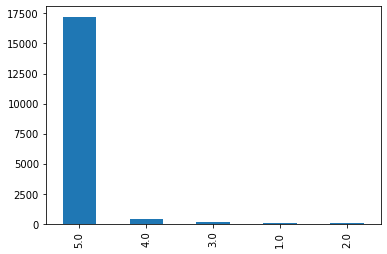

In [6]:
data['rating'].value_counts().plot.bar()

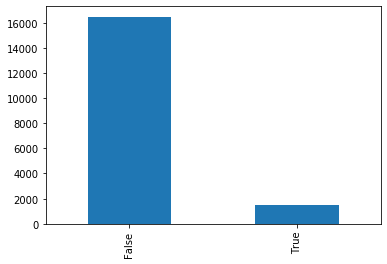

In [7]:
data['isAnonymous'].value_counts().plot.bar()

## Text Analysic Area

In [10]:
data['len_title'] = data['itemTitle'].str.len()
data['len_review'] = data['reviewContent'].str.len()

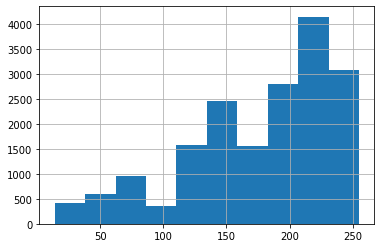

In [11]:
data['len_title'].hist()

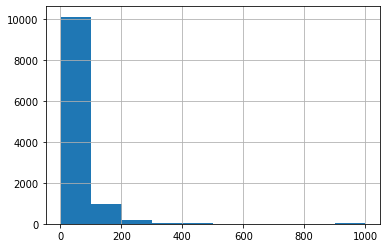

In [12]:
data['len_review'].hist()

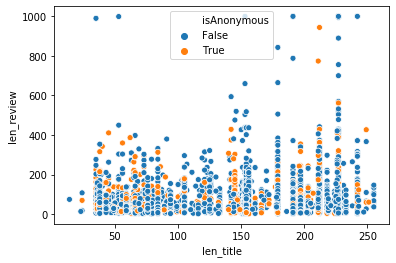

In [15]:
sns.scatterplot(data['len_title'],data['len_review'],hue=data['isAnonymous'])

In [16]:
data.sort_values(by='len_review',ascending=False)

,itemId,sellerId,buyerId,itemTitle,reviewType,rating,reviewContent,isAnonymous,boughtDate,reviewTime,len_title,len_review
1250,946100200,1.001820e+11,1.000900e+11,หม้อทอด เครื่องทอดไร้มัน หม้อทอดไร้น้ำมัน หม้อ...,PRODUCT_REVIEW,5.0,สืนค้ามากค่ะแพื่อนชอบมาก\nสืนค้ามากค่ะแพื่อนชอ...,False,02 ก.ค. 2020,11 ก.ค. 2020,227,1000.0
1249,946100200,1.001820e+11,1.000900e+11,หม้อทอด เครื่องทอดไร้มัน หม้อทอดไร้น้ำมัน หม้อ...,PRODUCT_REVIEW,5.0,สืนค้ามากค่ะแพื่อนชอบมาก\nสืนค้ามากค่ะแพื่อนชอ...,False,01 ก.ค. 2020,11 ก.ค. 2020,227,1000.0
644,800338091,1.001790e+11,1.000790e+11,หม้อทอด เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ หม...,PRODUCT_REVIEW,5.0,Okay. Works well.เป็นของใหม่ พร้อมใช้งานครับ\n...,False,17 ก.ค. 2020,3 สัปดาห์ก่อน,242,1000.0
6599,803270591,1.001790e+11,1.000900e+11,หม้อทอดลมร้อน หม้อทอดไฟฟ้า เครื่องทอดอัจฉริยะ ...,PRODUCT_REVIEW,5.0,Good quality productsGooGood quality productsG...,False,06 ก.ค. 2020,11 ก.ค. 2020,191,1000.0
6600,803270591,1.001790e+11,1.000900e+11,หม้อทอดลมร้อน หม้อทอดไฟฟ้า เครื่องทอดอัจฉริยะ ...,PRODUCT_REVIEW,5.0,ถือว่าดีมาก ในราค่านี้ครับ\nถือว่าดีมาก ในราค่...,False,27 มิ.ย. 2020,11 ก.ค. 2020,191,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17956,7513065,6.960000e+03,3.576182e+06,OXYGEN หม้อทอดไร้น้ำมัน รุ่น KW-814 (สีขาว),PRODUCT_REVIEW,3.0,NaN,True,28 ก.ย. 2016,23 พ.ค. 2018,43,NaN
17957,7513065,6.960000e+03,4.481570e+06,OXYGEN หม้อทอดไร้น้ำมัน รุ่น KW-814 (สีขาว),PRODUCT_REVIEW,5.0,NaN,False,09 พ.ย. 2016,11 พ.ค. 2018,43,NaN
17958,7513065,6.960000e+03,4.672953e+06,OXYGEN หม้อทอดไร้น้ำมัน รุ่น KW-814 (สีขาว),PRODUCT_REVIEW,5.0,NaN,False,16 มิ.ย. 2016,01 ก.ย. 2018,43,NaN
17960,7513065,6.960000e+03,5.052554e+06,OXYGEN หม้อทอดไร้น้ำมัน รุ่น KW-814 (สีขาว),PRODUCT_REVIEW,4.0,NaN,False,06 ส.ค. 2016,05 ก.พ. 2018,43,NaN
